# Dataset 4: Finding Association Rules on School Supplies Dataset 

*Notebook by: Allen Aboy, Franchezka Cruz, Christopher Pinpin - CSMODEL S12*

### Import Libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The Dataset

For this notebook, we will be working on `Dataset 4`, whose context is ***school supplies*** bought in a shop.Each row in the dataset contains a list of items bought by a customer for a single transaction. 

### Reading the Dataset

To be able to explore our dataset, our first step is to load it using pandas. We will also be converting items represented as `float` to `int`.

In [2]:
supplies_df = pd.read_csv('Dataset4.csv', header = None)
supplies_df = supplies_df.astype(pd.Int32Dtype()) # convert float to int
supplies_df

,0,1,2,3,4,5,6,7
0,3,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,5,9,10,11,12,14,<NA>,<NA>
3,2,5,6,13,<NA>,<NA>,<NA>,<NA>
4,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
295,1,12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
296,9,11,12,15,17,<NA>,<NA>,<NA>
297,1,6,7,8,10,15,18,<NA>
298,16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [3]:
supplies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       300 non-null    Int32
 1   1       257 non-null    Int32
 2   2       213 non-null    Int32
 3   3       183 non-null    Int32
 4   4       152 non-null    Int32
 5   5       115 non-null    Int32
 6   6       71 non-null     Int32
 7   7       33 non-null     Int32
dtypes: Int32(8)
memory usage: 11.8 KB


State the name of the dataset. Describe the structure of the dataset file. How many observations are there in the dataset? How many variables are there in the dataset?

THIS NEEDS TO BE SHOWN IN THE FORMAT 

BASKET 0 [3 5]

BASKET 1 [1 2]

PERO NDI KO MAGAWA NG WALANG NA T___T

In [4]:
supplies_df.values.tolist()

[[3, 5, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [1, 2, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [5, 9, 10, 11, 12, 14, <NA>, <NA>],
 [2, 5, 6, 13, <NA>, <NA>, <NA>, <NA>],
 [3, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [0, 2, 8, 9, 11, 13, <NA>, <NA>],
 [2, 9, 11, 13, 19, <NA>, <NA>, <NA>],
 [4, 5, 6, 7, 8, <NA>, <NA>, <NA>],
 [0, 8, 15, 16, <NA>, <NA>, <NA>, <NA>],
 [0, 5, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [4, 17, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [8, 10, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [2, 5, 9, 12, 17, 18, <NA>, <NA>],
 [6, 8, 9, 16, 17, 18, 19, <NA>],
 [7, 12, 15, 17, <NA>, <NA>, <NA>, <NA>],
 [9, 12, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [0, 3, 8, 10, 13, 16, 19, <NA>],
 [1, 8, 15, <NA>, <NA>, <NA>, <NA>, <NA>],
 [7, 9, 11, 13, 19, <NA>, <NA>, <NA>],
 [4, 10, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>],
 [3, 9, 16, <NA>, <NA>, <NA>, <NA>, <NA>],
 [0, 1, 3, 8, 9, 11, 15, 18],
 [0, 7, 8, 9, 17, 18, 19, <NA>],
 [1, 14, 15, 17, 18, <NA>, <NA>, <NA>],
 [17, <NA>, <NA>, <NA>, <NA>, <

In [5]:
values = supplies_df.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    
temp_df = supplies_df.stack().map(value_dict).unstack()

carts = []
for i in range(temp_df.shape[0]):
    cart = np.sort([int(x) for x in temp_df.iloc[i].values.tolist() if str(x) != 'nan'])
    carts.append(cart)
    
supplies_df = pd.DataFrame([[0 for _ in range(20)] for _ in range(300)], columns=values)

for i, cart in enumerate(carts):
    supplies_df.iloc[i, cart] = 1

    
supplies_df = supplies_df.reindex(sorted(supplies_df.columns), axis=1)

In [6]:
supplies_df.columns = ['Bond Paper','Index Card','Intermediate Pad Paper',
                        'Construction Paper','Pencil','Sharpener',
                        'Eraser','Marker','Yellow Pad',
                        'Crayon','Whiteboard','Ruler',
                        'Graph Paper','Protractor','Paint Brush',
                        'Poster Paint','Acrylic Paint','Watercolor',
                        'Canvas','Notebook']
supplies_df

,Bond Paper,Index Card,Intermediate Pad Paper,Construction Paper,Pencil,Sharpener,Eraser,Marker,Yellow Pad,Crayon,Whiteboard,Ruler,Graph Paper,Protractor,Paint Brush,Poster Paint,Acrylic Paint,Watercolor,Canvas,Notebook
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0
297,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# DI KO ALAM IF NECESSARY PA TO PERO FEEL KO NDI NA KASI NUMBERS NA SYA MINAMAP LANG TO INTO DICTIONARY

In [7]:
baskets = []
for i in range(temp_df.shape[0]):
    basket = np.sort([int(x) for x in temp_df.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

In [8]:
for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1]
Basket 1 [2 3]
Basket 2 [1 4 5 6 7 8]
Basket 3 [ 1  3  9 10]
Basket 4 [0]
Basket 5 [ 3  4  6 10 11 12]
Basket 6 [ 3  4  6 10 13]
Basket 7 [ 1  9 12 14 15]
Basket 8 [11 12 16 17]
Basket 9 [ 1 11]
Basket 10 [14 18]
Basket 11 [ 5 12]
Basket 12 [ 1  3  4  7 18 19]
Basket 13 [ 4  9 12 13 17 18 19]
Basket 14 [ 7 15 16 18]
Basket 15 [4 7]
Basket 16 [ 0  5 10 11 12 13 17]
Basket 17 [ 2 12 16]
Basket 18 [ 4  6 10 13 15]
Basket 19 [ 5 14]
Basket 20 [ 0  4 17]
Basket 21 [ 0  2  4  6 11 12 16 19]
Basket 22 [ 4 11 12 13 15 18 19]
Basket 23 [ 2  8 16 18 19]
Basket 24 [18]
Basket 25 [ 2  3  5 11 12 13 15 18]
Basket 26 [ 1  2  4  5 11 19]
Basket 27 [17]
Basket 28 [ 7 12 19]
Basket 29 [ 3  4  7  8  9 13]
Basket 30 [ 2  3  5  9 11 19]
Basket 31 [ 0  1  6  9 12 13 14 15]
Basket 32 [4]
Basket 33 [ 0  3  7 10 14]
Basket 34 [16]
Basket 35 [15]
Basket 36 [ 3  4  8 11 15]
Basket 37 [ 3  7  9 10 14 18]
Basket 38 [ 1  3  6  9 10 14 17]
Basket 39 [ 2 11 17]
Basket 40 [ 2  8  9 12 13 14]
Basket 41 

In [9]:
values = supplies_df.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    
print(value_dict)
print("Unique values: " + str(len(values)))

{0: 0, 1: 1}
Unique values: 2


In [10]:
# mali thsis 

baskets = []

for i in range(supplies_df.shape[0]): 
    basket = [int(x) for x in supplies_df.values.tolist() if str(x) != '<NA>']

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [11]:
supplies_df.describe()

,Bond Paper,Index Card,Intermediate Pad Paper,Construction Paper,Pencil,Sharpener,Eraser,Marker,Yellow Pad,Crayon,Whiteboard,Ruler,Graph Paper,Protractor,Paint Brush,Poster Paint,Acrylic Paint,Watercolor,Canvas,Notebook
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.253333,0.266667,0.240000,0.186667,0.213333,0.216667,0.196667,0.186667,0.243333,0.270000,0.166667,0.230000,0.230000,0.200000,0.186667,0.220000,0.196667,0.226667,0.240000,0.243333
std,0.435647,0.442956,0.427797,0.390295,0.410346,0.412662,0.398142,0.390295,0.429812,0.444701,0.373301,0.421536,0.421536,0.400668,0.390295,0.414938,0.398142,0.419375,0.427797,0.429812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

### What are the Top 5 most common items bought in the bookstore?

In [17]:
suppliesCount = []
for i in supplies_df.columns:
    supplyBought = supplies_df[i].value_counts()
    suppliesCount.append([i,supplyBought[1]])
    
suppliesCount.sort(key=lambda x: x[1], reverse=True)


supplies_df[supplies_df == 1].count() #Put into another variable


#for i in range(len(gamesCount)):
    #print(gamesCount[i][0],":",gamesCount[i][1])
    
    
countSupplies = [] 
for i in range(len(suppliesCount)):
    countSupplies.append(suppliesCount[i][1])

        
nameSupplies = [] 
for i in range(len(suppliesCount)):
    nameSupplies.append(suppliesCount[i][0])
    

eda1_df      = pd.DataFrame(data = countSupplies);
eda1_df.index = nameSupplies;

eda1_df.rename(columns={ eda1_df.columns[0]: "Supplies Bought" }, inplace = True)
eda1_df


,Supplies Bought
Crayon,81
Index Card,80
Bond Paper,76
Yellow Pad,73
Notebook,73
Intermediate Pad Paper,72
Canvas,72
Ruler,69
Graph Paper,69
Watercolor,68


In [14]:
eda1_df.describe()

,Supply Count
count,20.000000
mean,66.200000
std,8.605995
min,50.000000
25%,59.000000
50%,67.000000
75%,72.250000
max,81.000000


Text(0, 0.5, 'Supplies')

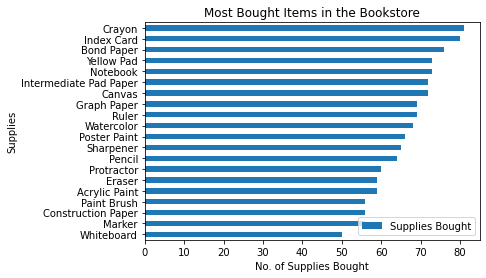

In [18]:
eda1_df.sort_values("Supplies Bought").plot.barh()
plt.title("Most Bought Items in the Bookstore")
plt.xlabel("No. of Supplies Bought")
plt.ylabel("Supplies")